In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import pickle
import random
random.seed(42)
import urllib
from urllib.parse import urlparse

In [3]:
df = pd.read_csv(".\\data\\processed_urls.csv")

In [4]:
df.shape

(187177, 37)

In [5]:
df['is_phishing'].value_counts(normalize=True)

0    0.956998
1    0.043002
Name: is_phishing, dtype: float64

In [10]:
X = df.drop(columns=['url', 'protocol', 'domain', 'target', 'path', 'query', 'fragment','is_phishing','response'])
y = df['is_phishing']

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [12]:
X.head()

,url_length,qty_dot_url,qty_hyphen_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_hashtag_url,qty_percent_url,...,query_length,qty_dot_query,qty_slash_query,qty_questionmark_query,qty_equal_query,qty_at_query,qty_and_query,qty_percent_query,qty_dot_fragment,qty_at_fragment
0,32,3,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45,2,2,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,2,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57,2,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40,2,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [14]:
def get_scores_sc(model):
    
    # instantiate model
    model = model()
    
    # fit to scaled data
    model.fit(X_train_sc, y_train)
    
    # make predictions
    preds = model.predict(X_test_sc)

    # print results
    print(f'{model} Training Score: {model.score(X_train_sc, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test_sc, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [15]:
def get_scores(model):
    
    # instantiate model
    model = model()
    
    # fit to data
    model.fit(X_train, y_train)
    
    # make predictions
    preds = model.predict(X_test)

    # print results
    print(f'{model} Training Score: {model.score(X_train, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [16]:
get_scores_sc(SGDClassifier)

SGDClassifier() Training Score: 0.9983259962103403
SGDClassifier() Testing Score: 0.9983331552516295

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44826
           1       1.00      0.96      0.98      1969

    accuracy                           1.00     46795
   macro avg       1.00      0.98      0.99     46795
weighted avg       1.00      1.00      1.00     46795

[[44823     3]
 [   75  1894]]


In [17]:
get_scores(AdaBoostClassifier)

AdaBoostClassifier() Training Score: 0.998361613312248
AdaBoostClassifier() Testing Score: 0.9983972646650283

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44826
           1       1.00      0.96      0.98      1969

    accuracy                           1.00     46795
   macro avg       1.00      0.98      0.99     46795
weighted avg       1.00      1.00      1.00     46795

[[44826     0]
 [   75  1894]]


In [18]:
get_scores(GradientBoostingClassifier)

GradientBoostingClassifier() Training Score: 0.9988673761593366
GradientBoostingClassifier() Testing Score: 0.9987605513409552

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44826
           1       1.00      0.97      0.99      1969

    accuracy                           1.00     46795
   macro avg       1.00      0.99      0.99     46795
weighted avg       1.00      1.00      1.00     46795

[[44825     1]
 [   57  1912]]


In [19]:
get_scores_sc(LogisticRegression)

LogisticRegression() Training Score: 0.9983188727899588
LogisticRegression() Testing Score: 0.9983331552516295

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44826
           1       1.00      0.96      0.98      1969

    accuracy                           1.00     46795
   macro avg       1.00      0.98      0.99     46795
weighted avg       1.00      1.00      1.00     46795

[[44823     3]
 [   75  1894]]


In [20]:
get_scores_sc(KNeighborsClassifier)

KNeighborsClassifier() Training Score: 0.998831759057429
KNeighborsClassifier() Testing Score: 0.998739181536489

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44826
           1       1.00      0.97      0.98      1969

    accuracy                           1.00     46795
   macro avg       1.00      0.99      0.99     46795
weighted avg       1.00      1.00      1.00     46795

[[44822     4]
 [   55  1914]]


In [21]:
get_scores(DecisionTreeClassifier)

DecisionTreeClassifier() Training Score: 0.9993161516433731
DecisionTreeClassifier() Testing Score: 0.9989101399722192

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44826
           1       1.00      0.98      0.99      1969

    accuracy                           1.00     46795
   macro avg       1.00      0.99      0.99     46795
weighted avg       1.00      1.00      1.00     46795

[[44824     2]
 [   49  1920]]


In [22]:
get_scores(BaggingClassifier)

BaggingClassifier() Training Score: 0.9992734111210839
BaggingClassifier() Testing Score: 0.9989528795811519

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44826
           1       1.00      0.98      0.99      1969

    accuracy                           1.00     46795
   macro avg       1.00      0.99      0.99     46795
weighted avg       1.00      1.00      1.00     46795

[[44824     2]
 [   47  1922]]


In [23]:
get_scores(ExtraTreesClassifier)

ExtraTreesClassifier() Training Score: 0.9993161516433731
ExtraTreesClassifier() Testing Score: 0.9987605513409552

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44826
           1       1.00      0.97      0.99      1969

    accuracy                           1.00     46795
   macro avg       1.00      0.99      0.99     46795
weighted avg       1.00      1.00      1.00     46795

[[44820     6]
 [   52  1917]]


In [24]:
get_scores(RandomForestClassifier)

RandomForestClassifier() Training Score: 0.9993161516433731
RandomForestClassifier() Testing Score: 0.9988032909498878

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44826
           1       1.00      0.97      0.99      1969

    accuracy                           1.00     46795
   macro avg       1.00      0.99      0.99     46795
weighted avg       1.00      1.00      1.00     46795

[[44823     3]
 [   53  1916]]


In [25]:
rfc = RandomForestClassifier()
rfc_params = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600]}

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = rfc_params, cv = 3, verbose=2, random_state=42, 
                                n_jobs = -1)
rfc_random.fit(X_train, y_train)
print(f'Best Parameters: {rfc_random.best_params_}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False}


Training Score: 0.9992947813822285
Testing Score: 0.9988460305588204

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44826
           1       1.00      0.97      0.99      1969

    accuracy                           1.00     46795
   macro avg       1.00      0.99      0.99     46795
weighted avg       1.00      1.00      1.00     46795

[[44824     2]
 [   52  1917]]


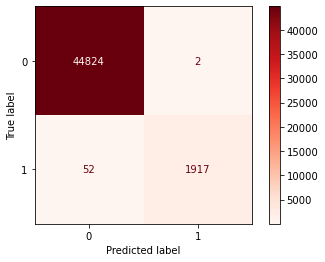

In [26]:
rfc = RandomForestClassifier(n_estimators = 400, min_samples_split= 5, min_samples_leaf= 1, max_features= 'auto', max_depth= 50, 
                             bootstrap= False, n_jobs= -1, random_state=42)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)
print(f'Training Score: {rfc.score(X_train, y_train)}')
print(f'Testing Score: {rfc.score(X_test, y_test)}')
print()
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot(cmap = 'Reds', values_format='');

In [27]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))
print("Recall: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))

Accuracy:  0.9988460305588204
Misclassification Rate:  0.0011539694411796132
Recall:  0.973590655154901
Specificity:  0.9999553830366306
Precision:  0.9989577905158937


In [28]:
# Create feature list
feature_list = list(X.columns)

# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: path_length          Importance: 0.278
Variable: qty_slash_url        Importance: 0.261
Variable: qty_slash_path       Importance: 0.225
Variable: url_length           Importance: 0.101
Variable: qty_dot_url          Importance: 0.035
Variable: qty_dot_path         Importance: 0.029
Variable: query_length         Importance: 0.013
Variable: domain_length        Importance: 0.012
Variable: qty_hyphen_path      Importance: 0.011
Variable: qty_equal_url        Importance: 0.01
Variable: qty_questionmark_url Importance: 0.009
Variable: qty_dot_domain       Importance: 0.008
Variable: qty_equal_query      Importance: 0.004
Variable: qty_hyphen_url       Importance: 0.001
Variable: qty_and_url          Importance: 0.001
Variable: qty_hyphen_domain    Importance: 0.001
Variable: qty_and_query        Importance: 0.001
Variable: qty_at_url           Importance: 0.0
Variable: qty_hashtag_url      Importance: 0.0
Variable: qty_percent_url      Importance: 0.0
Variable: qty_equal_path   

In [29]:
print(feature_list)

['url_length', 'qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_hashtag_url', 'qty_percent_url', 'domain_length', 'qty_dot_domain', 'qty_hyphen_domain', 'path_length', 'qty_dot_path', 'qty_hyphen_path', 'qty_slash_path', 'qty_equal_path', 'query_length', 'qty_dot_query', 'qty_slash_query', 'qty_questionmark_query', 'qty_equal_query', 'qty_at_query', 'qty_and_query', 'qty_percent_query', 'qty_dot_fragment', 'qty_at_fragment']


In [32]:
def predict_url(url):
    x = []
    protocol,domain,path,query,fragment = zip(*[urllib.parse.urlsplit(url)])
    x.append(len(url))
    x.append(url.count('.'))
    x.append(url.count('-'))
    x.append(url.count('/'))
    x.append(url.count('?'))
    x.append(url.count('='))
    x.append(url.count('@'))
    x.append(url.count('&'))
    x.append(url.count('#'))
    x.append(url.count('%'))
    
    x.append(len(domain))
    x.append(domain.count('.'))
    x.append(domain.count('-'))
    
    x.append(len(path))
    x.append(path.count('.'))
    x.append(path.count('-'))
    x.append(path.count('/'))
    x.append(path.count('='))
    
    x.append(len(query))
    x.append(query.count('.'))
    x.append(query.count('/'))
    x.append(query.count('?'))
    x.append(query.count('='))
    x.append(query.count('@'))
    x.append(query.count('&'))
    x.append(query.count('%'))
    
    x.append(fragment.count('.'))
    x.append(fragment.count('@'))
    
    df=pd.DataFrame(x).T
#     print(df)
    pred = rfc.predict(df)
    return(pred)
    

In [36]:

x = input("please enter url fot testing :")
pred = predict_url(x)
if pred:
    print("this is a phishing url")
else:
    print("good url!!")

please enter url fot testing :	http://cool-hat-5f34.documents-wrangler.workers.dev/
this is a phishing url
